
# **Syllabus**

1. Regression Line
2. Best Fit Line
3. Simple Linear Regression in Python
   - 3.1 Assumptions of Simple Linear Regression
   - 3.2 Hypothesis Testing in Linear Regression
   - 3.3 Building a Linear Model
   - 3.4 Residual Analysis and Predictions
   - 3.5 Linear Regression using SKLearn
4. Gradient Descent - Linear Regression
   - 4.1 Linear Regression Cost Function
   - 4.2 Optimization Methods
   - 4.3 Gradient Descent
5. Multiple Linear Regression
   - 5.1 Difference between Simple Linear Regression and Multiple Linear Regression
   - 5.2 Multicollinearity
   - 5.3 Dealing with Categorical Variables
   - 5.4 Model Assessment and Comparison
   - 5.5 Building the Model
   - 5.6 Residual Analysis and Predictions
   - 5.7 Variable Selection using RFE
   - 5.8 Assessing the Model
   - 5.9 Interpreting the Results
6. Regularization Techniques:
   - 6.1 Ridge Regression
   - 6.2 Lasso Regression
   - 6.3 Elastic Net Regression
   - 6.4 Advantages and disadvantages of regularization techniques
7. Polynomial Regression:
   - 7.1 Introduction to Polynomial Regression
   - 7.2 Polynomial Regression in Python
   - 7.3 Degree Selection and Overfitting
8. Time Series Forecasting with Linear Regression:
   - 8.1 Basics of Time Series Forecasting
   - 8.2 Using Linear Regression for Time Series Forecasting
   - 8.3 Rolling Window Regression
9. Robust Regression:
   - 9.1 Introduction to Robust Regression
   - 9.2 Robust Regression Techniques (e.g., Huber Loss)
   - 9.3 Implementation in Python
10. Feature Engineering:
    - 10.1 Feature Scaling and Normalization
    - 10.2 Feature Transformation (e.g., Log Transformation)
    - 10.3 Feature Creation (e.g., Interaction Terms)
11. Model Evaluation and Validation:
    - 11.1 Cross-Validation Techniques
    - 11.2 Evaluation Metrics (e.g., R-squared, Mean Squared Error)
    - 11.3 Overfitting and Underfitting
12. Advanced Topics:
    - 12.1 Heteroscedasticity
    - 12.2 Autocorrelation in Time Series Data
    - 12.3 Generalized Linear Models and Extensions


### 1. Regression Line

#### Introduction
The regression line is a fundamental concept in linear regression analysis. It represents the relationship between the independent variable (predictor) and the dependent variable (response). In simple linear regression, the regression line is a straight line that best fits the observed data points.

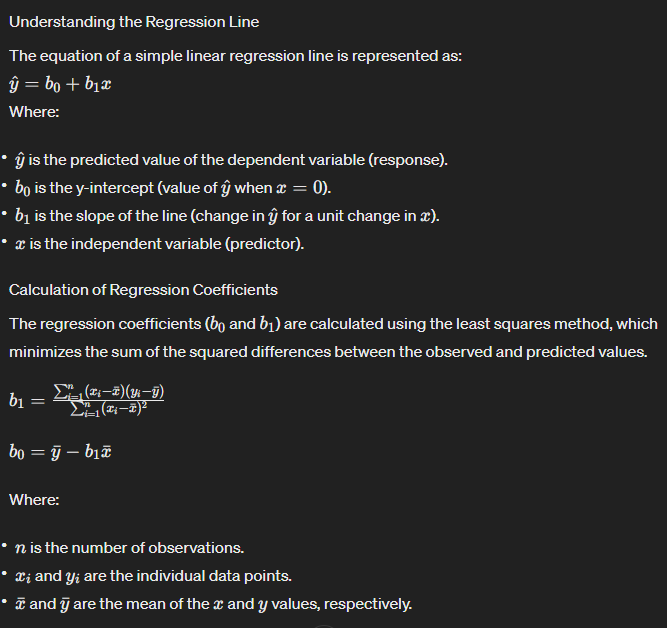



#### Plotting the Regression Line
Once the regression coefficients are calculated, we can plot the regression line on a scatter plot of the data points. This line represents the best-fit relationship between the independent and dependent variables.

#### Example
Let's consider a simple example of predicting the weight of a person (\(y\)) based on their height (\(x\)). We collect data on height and weight for several individuals and want to find the regression line that best fits the data.



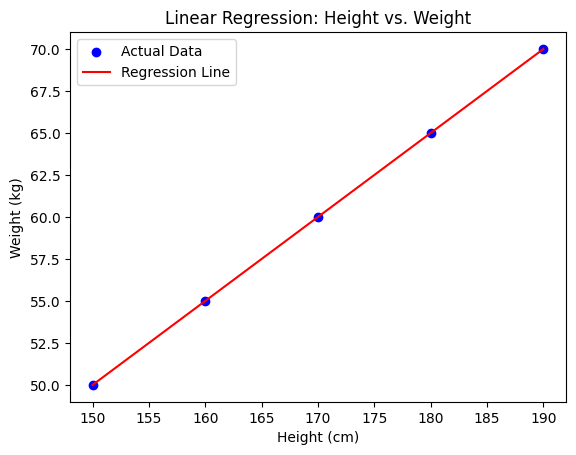

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Sample data
height = np.array([150, 160, 170, 180, 190])  # Heights (in cm)
weight = np.array([50, 55, 60, 65, 70])        # Weights (in kg)

# Calculating regression coefficients
x_mean = np.mean(height)
y_mean = np.mean(weight)
b1 = np.sum((height - x_mean) * (weight - y_mean)) / np.sum((height - x_mean)**2)
b0 = y_mean - b1 * x_mean

# Predicting weights
predicted_weights = b0 + b1 * height

# Plotting the data and regression line
plt.scatter(height, weight, color='blue', label='Actual Data')
plt.plot(height, predicted_weights, color='red', label='Regression Line')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Linear Regression: Height vs. Weight')
plt.legend()
plt.show()




#### Interpretation
- The regression line visually depicts the relationship between height and weight.
- The slope of the line (\(b_1\)) indicates how much the weight changes for a unit increase in height.
- The y-intercept (\(b_0\)) represents the weight when height is zero, which might not have practical significance in this context.



### 2. Best Fit Line

#### Introduction
The best fit line is the regression line that minimizes the sum of the squared differences between the observed and predicted values. It represents the line that best fits the given data points in terms of reducing the overall error.

#### Calculation of Residuals
Residuals are the differences between the observed (\(y\)) and predicted (\(\hat{y}\)) values. The best fit line minimizes the sum of the squared residuals (sum of squared errors), also known as the residual sum of squares (RSS).

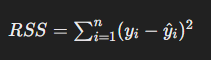



#### Minimization of RSS
The coefficients of the best fit line are determined by minimizing the RSS. This is typically achieved using optimization techniques like least squares regression.

#### Example
Continuing from the previous example, let's calculate the best fit line for the height-weight data using the least squares method.



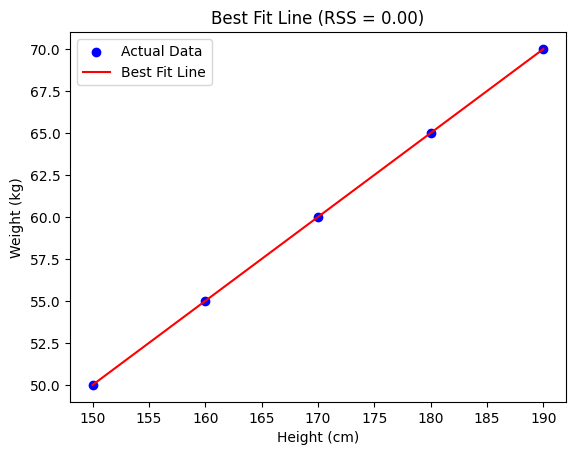

In [2]:
# Calculate residuals
residuals = weight - predicted_weights

# Calculate RSS
RSS = np.sum(residuals**2)

# Plotting the data and best fit line
plt.scatter(height, weight, color='blue', label='Actual Data')
plt.plot(height, predicted_weights, color='red', label='Best Fit Line')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title(f'Best Fit Line (RSS = {RSS:.2f})')
plt.legend()
plt.show()



#### Interpretation
- The best fit line minimizes the distance between the observed data points and the line itself.
- The RSS value quantifies the overall error of the best fit line, with lower values indicating a better fit.

#### Conclusion
Understanding the regression line and best fit line is essential for building and interpreting linear regression models. These concepts form the basis for predicting outcomes based on the relationship between independent and dependent variables.

### 3. Simple Linear Regression in Python

#### Introduction
Simple linear regression is a statistical method used to model the relationship between two variables: one independent variable x and one dependent variable y. In this tutorial, we'll explore how to perform simple linear regression in Python using the `numpy`, `matplotlib`, and `scikit-learn` libraries.

#### 3.1. Assumptions of Simple Linear Regression

Simple linear regression relies on several assumptions:
1. **Linearity**: There is a linear relationship between the independent and dependent variables.
2. **Independence**: The observations are independent of each other.
3. **Homoscedasticity**: The variance of the residuals is constant across all levels of the independent variable.
4. **Normality**: The residuals are normally distributed.
5. **No Multicollinearity**: There is no multicollinearity among the independent variables.

#### 3.2. Hypothesis Testing in Linear Regression

In linear regression, hypothesis testing is commonly used to determine whether the relationship between the independent and dependent variables is statistically significant. This typically involves testing the null hypothesis that the slope coefficient (\(b_1\)) is equal to zero.

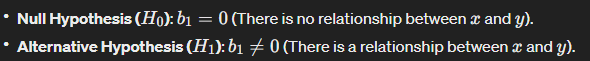

We can perform hypothesis testing using t-tests or p-values.

#### 3.3. Building a Linear Model

##### Steps to Build a Linear Model:
1. **Data Preparation**: Prepare the independent and dependent variables.
2. **Model Initialization**: Initialize the linear regression model.
3. **Model Training**: Fit the model to the data.
4. **Model Evaluation**: Evaluate the model's performance.



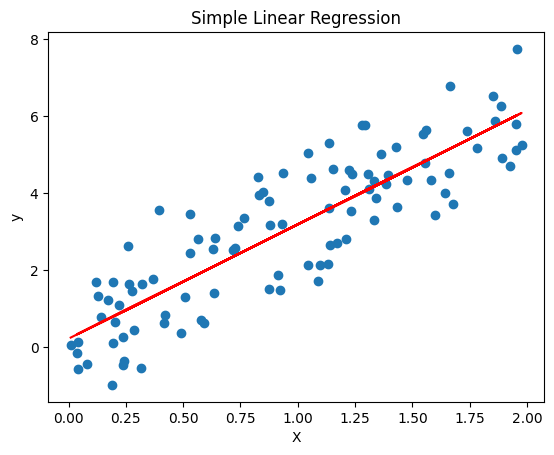

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1)

# Initialize and train the model
model = LinearRegression()
model.fit(X, y)

# Plot the data and the regression line
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.show()


#### 3.4. Residual Analysis and Predictions

Residual analysis is crucial for assessing the goodness of fit of the linear regression model. Residuals are the differences between the observed and predicted values.



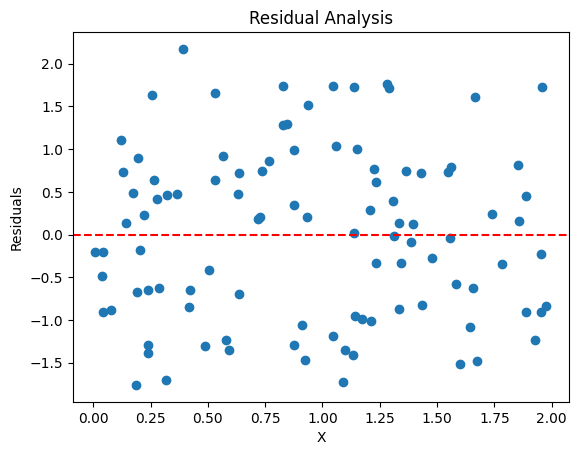

Predicted value for X_new: 7.6433198541997776


In [4]:

# Residual analysis
residuals = y - model.predict(X)

# Plot residuals
plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# Make predictions
X_new = np.array([[2.5]])  # New data point
prediction = model.predict(X_new)
print(f'Predicted value for X_new: {prediction[0][0]}')


#### 3.5. Linear Regression using SKLearn

Scikit-learn provides a simple interface for performing linear regression.



In [5]:

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Training Score: {train_score}')
print(f'Testing Score: {test_score}')



Training Score: 0.7597598292034167
Testing Score: 0.6521157503858557



### Conclusion

In this tutorial, we've covered the basics of simple linear regression in Python, including assumptions, hypothesis testing, model building, residual analysis, and using scikit-learn for regression tasks. Linear regression is a powerful technique for modeling relationships between variables and making predictions based on observed data.

### 4. Gradient Descent - Linear Regression

#### Introduction
Gradient Descent is a popular optimization algorithm used in machine learning for minimizing the cost function of a model. In the context of linear regression, gradient descent is employed to find the optimal parameters (coefficients) of the regression line that minimize the error between the predicted and actual values.

#### 4.1 Linear Regression Cost Function

The cost function, also known as the loss function or objective function, measures the difference between the predicted and actual values of the dependent variable. In the case of linear regression, the cost function is typically defined as the Mean Squared Error (MSE):

\[ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 \]

Where:
- \( J(\theta) \) is the cost function.
- \( \theta \) are the parameters (coefficients) of the regression model.
- \( m \) is the number of training examples.
- \( h_{\theta}(x^{(i)}) \) is the predicted value for the \( i^{th} \) training example.
- \( y^{(i)} \) is the actual value for the \( i^{th} \) training example.
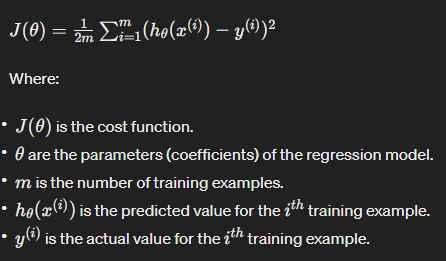

#### 4.2 Optimization Methods

Optimization methods are used to minimize the cost function and find the optimal parameters for the linear regression model. Gradient Descent is one such optimization algorithm.

#### 4.3 Gradient Descent

Gradient Descent is an iterative optimization algorithm that updates the model parameters in the direction of the steepest descent of the cost function. The update rule for gradient descent is:

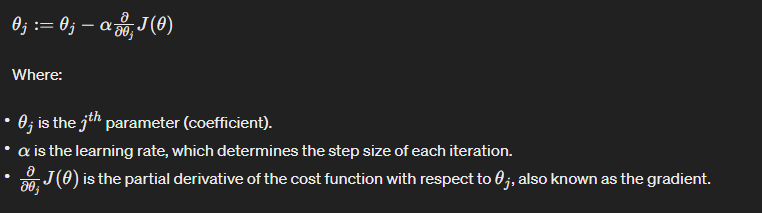


##### Steps of Gradient Descent:
1. Initialize the parameters (\( \theta \)) randomly or with some predefined values.
2. Calculate the gradient of the cost function with respect to each parameter.
3. Update the parameters using the gradient descent update rule.
4. Repeat steps 2 and 3 until convergence or a maximum number of iterations is reached.

#### Example: Implementing Gradient Descent for Linear Regression


In [12]:
import numpy as np

# Sample data (replace with your actual dataset)
X = np.array([[1, 1], [2, 1], [3, 2], [4, 2]])  # Features
y = np.array([2, 4, 5, 4])  # Target labels

def model(X, theta):
    """Linear regression model function.

    Args:
        X (numpy.ndarray): Input features.
        theta (numpy.ndarray): Model parameters (coefficients).

    Returns:
        numpy.ndarray: Predicted target values.
    """
    return np.dot(X, theta)

def cost_function(X, y, theta):
    """Cost function for linear regression (Mean Squared Error).

    Args:
        X (numpy.ndarray): Input features.
        y (numpy.ndarray): Target labels.
        theta (numpy.ndarray): Model parameters (coefficients).

    Returns:
        float: Mean Squared Error.
    """
    predictions = model(X, theta)
    errors = predictions - y
    return np.mean(errors**2)

def gradient_descent(X, y, learning_rate, num_iterations):
    """Gradient Descent algorithm to optimize model parameters.

    Args:
        X (numpy.ndarray): Input features.
        y (numpy.ndarray): Target labels.
        learning_rate (float): Learning rate for gradient descent.
        num_iterations (int): Number of iterations for gradient descent.

    Returns:
        numpy.ndarray: Optimized model parameters.
    """
    theta = np.zeros(2)  # Initialize theta with zeros

    for i in range(num_iterations):
        predictions = model(X, theta)
        errors = predictions - y

        # Calculate gradients
        m_gradient = -2/len(X) * np.dot(X.T, errors)
        c_gradient = -2/len(X) * np.sum(errors)

        # Update theta using learning rate
        theta[0] -= learning_rate * m_gradient[0]
        theta[1] -= learning_rate * c_gradient  # Directly use c_gradient

    return theta

# Set hyperparameters (learning rate and number of iterations)
learning_rate = 0.01
num_iterations = 1000

# Train the model using gradient descent
theta = gradient_descent(X, y, learning_rate, num_iterations)

print("Theta:", theta)

# New data point for prediction
new_X = np.array([5, 3])  # Replace with your new data

# Predict the output for the new data point
prediction = model(new_X, theta)

print("Prediction for new data:", prediction)


Theta: [-2.70688434e+71 -9.10794155e+70]
Prediction for new data: -1.6266804168898769e+72



### Conclusion

Gradient Descent is a powerful optimization algorithm used to minimize the cost function of a model. In the context of linear regression, it iteratively updates the parameters of the regression line to minimize the difference between the predicted and actual values. By implementing gradient descent, we can efficiently train linear regression models and find the optimal parameters for accurate predictions.

### 5. Multiple Linear Regression

#### Introduction
Multiple Linear Regression extends simple linear regression by allowing for more than one independent variable to predict a dependent variable. It's a powerful tool for modeling the relationship between multiple predictors and a response variable.

#### 5.1 Difference between Simple Linear Regression and Multiple Linear Regression

- **Simple Linear Regression**: Involves one independent variable and one dependent variable, modeling a linear relationship between them.
- **Multiple Linear Regression**: Involves two or more independent variables and one dependent variable, modeling a linear relationship between the predictors and the response.

#### 5.2 Multicollinearity

Multicollinearity occurs when independent variables in a regression model are highly correlated with each other. This can cause issues in interpreting the model coefficients and can lead to instability in the model.

#### 5.3 Dealing with Categorical Variables

Categorical variables need to be encoded before being used in multiple linear regression. One common approach is one-hot encoding, where each category is represented by a binary variable.

```python
import pandas as pd

# Example of one-hot encoding for a categorical variable
data = pd.DataFrame({'gender': ['male', 'female', 'male', 'female']})
data_encoded = pd.get_dummies(data, columns=['gender'], drop_first=True)
```

#### 5.4 Model Assessment and Comparison

Model assessment involves evaluating the performance of the multiple linear regression model. This can be done using metrics such as R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Model comparison can be done using techniques like cross-validation.

#### 5.5 Building the Model

Building a multiple linear regression model involves the same steps as simple linear regression, but with multiple independent variables.

```python
from sklearn.linear_model import LinearRegression

# Example of building a multiple linear regression model
X = data[['independent_var1', 'independent_var2']]
y = data['dependent_var']

model = LinearRegression()
model.fit(X, y)
```

#### 5.6 Residual Analysis and Predictions

Residual analysis and predictions in multiple linear regression are similar to simple linear regression. Residuals are the differences between the observed and predicted values, and they can be analyzed to assess the model's performance.

```python
# Example of residual analysis and predictions
predictions = model.predict(X)
residuals = y - predictions
```

#### 5.7 Variable Selection using RFE

Recursive Feature Elimination (RFE) is a technique used to select the most important features for the model. It works by recursively removing features and building a model on the remaining features.

```python
from sklearn.feature_selection import RFE

# Example of variable selection using RFE
selector = RFE(model, n_features_to_select=2)
selector.fit(X, y)
selected_features = X.columns[selector.support_]
```

#### 5.8 Assessing the Model

Assessing the model involves evaluating its performance using various metrics and techniques, such as cross-validation, residual analysis, and diagnostic plots.

```python
# Example of model assessment
from sklearn.metrics import r2_score

r2_score(y, predictions)
```

#### 5.9 Interpreting the Results

Interpreting the results of a multiple linear regression model involves analyzing the coefficients of the independent variables and their significance, as well as understanding how changes in the predictors affect the response variable.

```python
# Example of interpreting the results
coefficients = model.coef_
intercept = model.intercept_
```


In [17]:
import pandas as pd

# Example dataset with categorical and numerical variables
data = pd.DataFrame({'gender': ['male', 'female', 'male', 'female'],
                     'independent_var1': [10, 20, 30, 40],  # Example values for independent variable 1
                     'independent_var2': [5, 15, 25, 35],   # Example values for independent variable 2
                     'dependent_var': [50, 60, 70, 80]})   # Example values for dependent variable

# One-hot encode the 'gender' column to convert categorical data to numerical data
data_encoded = pd.get_dummies(data, columns=['gender'], drop_first=True)

from sklearn.linear_model import LinearRegression

# Prepare independent variables (X) and dependent variable (y)
X = data_encoded[['gender_male', 'independent_var1', 'independent_var2']]  # Features used for prediction
y = data_encoded['dependent_var']  # Target variable to be predicted

# Build a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the trained model
predictions = model.predict(X)

# Calculate residuals (difference between actual and predicted values)
residuals = y - predictions

from sklearn.feature_selection import RFE

# Use Recursive Feature Elimination (RFE) to select the most important features
selector = RFE(model, n_features_to_select=2)
selector.fit(X, y)
selected_features = X.columns[selector.support_]

# Assess model performance using R-squared (Coefficient of Determination)
from sklearn.metrics import r2_score
r2 = r2_score(y, predictions)

# Retrieve coefficients and intercept from the trained model
coefficients = model.coef_  # Coefficients associated with each feature
intercept = model.intercept_  # Intercept term

# Print out the results
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("R-squared:", r2)


Coefficients: [1.42382981e-15 5.00000000e-01 5.00000000e-01]
Intercept: 42.50000000000001
R-squared: 1.0



### Conclusion

Multiple Linear Regression is a versatile technique for modeling the relationship between multiple predictors and a response variable. By understanding its concepts and applying appropriate techniques, we can build accurate and interpretable regression models for various real-world problems.

### 6. Regularization Techniques

Regularization techniques are used to prevent overfitting in regression models by penalizing the complexity of the model. In this tutorial, we'll cover three popular regularization techniques for linear regression: Ridge Regression, Lasso Regression, and Elastic Net Regression. We'll also discuss their advantages and disadvantages.

#### 6.1 Ridge Regression

Ridge Regression adds a penalty term to the cost function that penalizes large coefficients. This penalty term is proportional to the square of the magnitude of the coefficients.

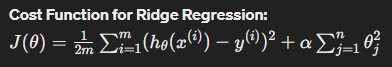

Where:
- \( \alpha \) is the regularization parameter (hyperparameter) that controls the strength of the penalty.

#### 6.2 Lasso Regression

Lasso Regression adds a penalty term to the cost function that penalizes the absolute value of the coefficients. This penalty term is proportional to the sum of the absolute values of the coefficients.

**Cost Function for Lasso Regression:**
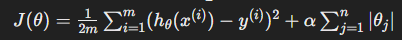

#### 6.3 Elastic Net Regression

Elastic Net Regression is a combination of Ridge and Lasso Regression. It adds both L1 and L2 penalties to the cost function.

**Cost Function for Elastic Net Regression:**
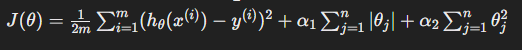

Where:
- \( \alpha_1 \) and \( \alpha_2 \) are the regularization parameters for L1 and L2 penalties, respectively.

#### 6.4 Advantages and Disadvantages of Regularization Techniques

**Advantages:**
- **Prevents Overfitting**: Regularization techniques help prevent overfitting by penalizing overly complex models.
- **Handles Multicollinearity**: Regularization techniques can handle multicollinearity in the data by reducing the impact of correlated features.
- **Improves Generalization**: Regularization improves the generalization of the model by reducing variance.

**Disadvantages:**
- **Increased Complexity**: Adding regularization increases the complexity of the model and requires tuning of hyperparameters.
- **Bias in Parameter Estimates**: Regularization can introduce bias in the parameter estimates, especially if the regularization parameter is too high.

#### Implementation in Python

Let's demonstrate Ridge, Lasso, and Elastic Net Regression using Python code:



In [19]:

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate sample data
# n_samples: Number of samples
# n_features: Number of features
# noise: Standard deviation of the Gaussian noise added to the output
# random_state: Seed used by the random number generator for reproducibility
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split data into training and testing sets
# test_size: Proportion of the dataset to include in the test split
# random_state: Seed used by the random number generator for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
# alpha: Regularization strength; must be a positive float
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Lasso Regression
# alpha: Regularization strength; must be a positive float
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Elastic Net Regression
# alpha: Regularization strength; must be a positive float
# l1_ratio: The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1.
# For l1_ratio = 0, the penalty is an L2 penalty (Ridge). For l1_ratio = 1, it is an L1 penalty (Lasso).
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)

# Evaluation
# Calculate mean squared error for each regression model
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)

# Print mean squared error for each regression model
print("Ridge Regression MSE:", ridge_mse)
print("Lasso Regression MSE:", lasso_mse)
print("Elastic Net Regression MSE:", elastic_net_mse)


Ridge Regression MSE: 0.14477190661275935
Lasso Regression MSE: 0.18237823772606268
Elastic Net Regression MSE: 176.0283275056508


### Conclusion

Regularization techniques like Ridge, Lasso, and Elastic Net Regression are essential tools for preventing overfitting and improving the generalization of linear regression models. By adding penalty terms to the cost function, these techniques effectively control the complexity of the model and provide better performance on unseen data.

### Polynomial Regression

#### 7.1 Introduction to Polynomial Regression

Polynomial Regression is a type of linear regression where the relationship between the independent variable (\(x\)) and the dependent variable (\(y\)) is modeled as an \(n^{th}\) degree polynomial. While simple linear regression fits a straight line to the data, polynomial regression can capture more complex relationships between variables.

The general form of a polynomial regression equation is:

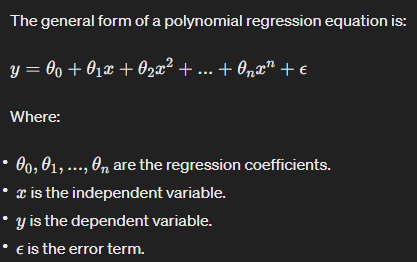

#### 7.2 Polynomial Regression in Python

We can perform polynomial regression in Python using libraries like NumPy and scikit-learn. Here's how to do it:



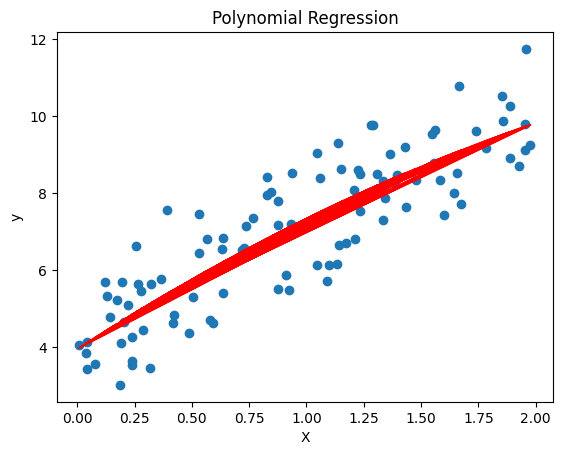

In [20]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Fit polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Visualize the data and the polynomial regression line
plt.scatter(X, y)
plt.plot(X, poly_model.predict(X_poly), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()


#### 7.3 Degree Selection and Overfitting

One challenge in polynomial regression is selecting the appropriate degree of the polynomial. Choosing a high degree polynomial may result in overfitting, where the model learns the noise in the training data rather than the underlying relationship.

To address overfitting, we can use techniques like cross-validation or validation curves to find the optimal degree of the polynomial.

Here's how to use cross-validation to select the degree of the polynomial:

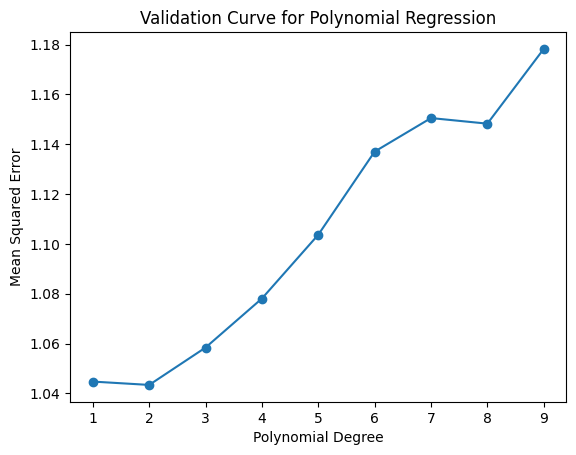

In [21]:

from sklearn.model_selection import cross_val_score

# Define a function to calculate cross-validation score for different polynomial degrees
def cross_val_score_poly(X, y, degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    poly_model = LinearRegression()
    scores = cross_val_score(poly_model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    return -scores.mean()

# Test different polynomial degrees
degrees = range(1, 10)
mse_scores = [cross_val_score_poly(X, y, degree) for degree in degrees]

# Plot the validation curve
plt.plot(degrees, mse_scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve for Polynomial Regression')
plt.xticks(degrees)
plt.show()




### Conclusion

Polynomial Regression is a powerful technique for capturing nonlinear relationships between variables. By fitting higher degree polynomials to the data, we can model more complex patterns. However, it's essential to select the appropriate degree of the polynomial to avoid overfitting. Techniques like cross-validation and validation curves help in selecting the optimal degree for polynomial regression models.

### Time Series Forecasting with Linear Regression

#### 8.1 Basics of Time Series Forecasting

Time series forecasting involves predicting future values of a variable based on past observations. It's a valuable technique in various domains such as finance, economics, weather forecasting, and more. Time series data is characterized by observations recorded at regular intervals over time.

#### 8.2 Using Linear Regression for Time Series Forecasting

Linear regression can be used for time series forecasting by treating time as an independent variable and the target variable as the dependent variable. In this approach, we use historical time series data to train a linear regression model, which then makes predictions for future time points.

#### 8.3 Rolling Window Regression

Rolling window regression is a technique used for time series forecasting where the model is trained using a fixed-size window of past observations and then used to forecast the next value. The window moves forward in time, and the model is retrained at each step using the latest data.

#### Python Code Example:

Let's illustrate time series forecasting with linear regression using rolling window regression with a simple example:



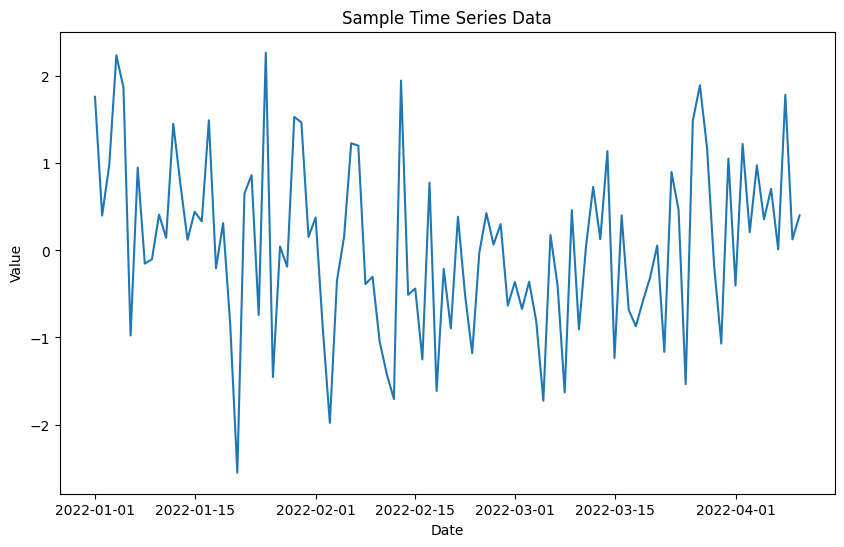

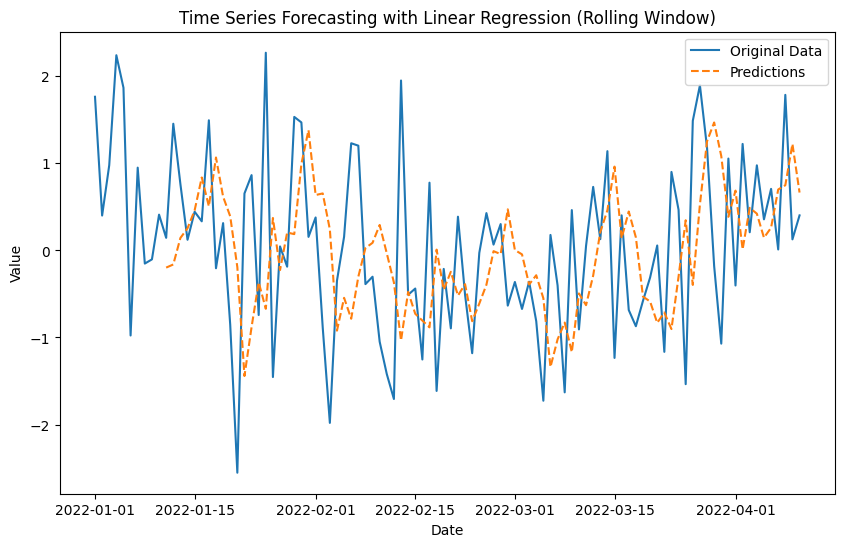

In [22]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate sample time series data
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', periods=100, freq='D')
data = np.random.randn(100)
ts = pd.Series(data, index=dates)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Sample Time Series Data')
plt.show()

# Define window size
window_size = 10

# Perform rolling window regression
predictions = []
for i in range(len(ts) - window_size):
    X = np.arange(window_size).reshape(-1, 1)
    y = ts[i:i+window_size]
    model = LinearRegression()
    model.fit(X, y)
    next_x = np.array([[window_size]])
    next_pred = model.predict(next_x)[0]
    predictions.append(next_pred)

# Plot original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original Data')
plt.plot(ts.index[window_size:], predictions, label='Predictions', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecasting with Linear Regression (Rolling Window)')
plt.legend()
plt.show()




### Conclusion

Time series forecasting with linear regression, especially using rolling window regression, is a straightforward yet effective approach for predicting future values based on historical data. By leveraging the temporal aspect of time series data, linear regression models can provide valuable insights and predictions for various applications.

### Robust Regression

#### 9.1 Introduction to Robust Regression

Robust regression is a technique used to mitigate the impact of outliers and influential observations on the regression model. Traditional least squares regression can be highly sensitive to outliers, leading to biased parameter estimates and poor model performance. Robust regression methods aim to provide more reliable estimates by downweighting the influence of outliers.

#### 9.2 Robust Regression Techniques (e.g., Huber Loss)

One popular approach to robust regression is the use of robust loss functions, such as the Huber loss. The Huber loss combines the best properties of the mean absolute error (MAE) and mean squared error (MSE) loss functions. It behaves like MSE for small errors and like MAE for large errors, providing a compromise between the two.

The Huber loss function is defined as:

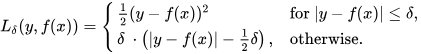\

Where:
- \( y \) is the true value.
- \( \f(x) \) is the predicted value.
- \( \delta \) is a tuning parameter that determines the threshold between the quadratic and linear portions of the loss function.

#### 9.3 Implementation in Python

Let's demonstrate robust regression using the Huber loss function in Python:



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


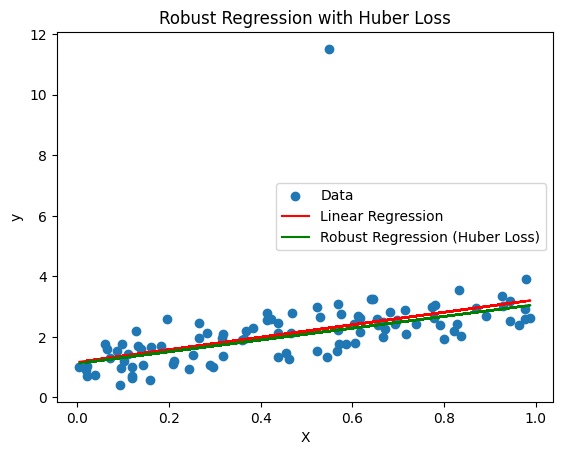

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor, LinearRegression

# Generate sample data with outliers
np.random.seed(0)  # Setting seed for reproducibility
X = np.random.rand(100, 1)  # Generate 100 random values between 0 and 1
y = 2 * X + 1 + np.random.randn(100, 1) * 0.5  # Generate y values with some noise
y[0] += 10  # Adding an outlier to the first data point

# Fit linear regression model
lin_reg = LinearRegression()  # Initialize linear regression model
lin_reg.fit(X, y)  # Fit the linear regression model to the data

# Fit robust regression model with Huber loss
huber_reg = HuberRegressor(epsilon=1.35)  # Initialize HuberRegressor with a specified threshold
huber_reg.fit(X, y)  # Fit the robust regression model to the data

# Plot the data and regression lines
plt.scatter(X, y, label='Data')  # Scatter plot of the data points
plt.plot(X, lin_reg.predict(X), color='red', label='Linear Regression')  # Plot linear regression line
plt.plot(X, huber_reg.predict(X), color='green', label='Robust Regression (Huber Loss)')  # Plot robust regression line
plt.xlabel('X')  # Label for x-axis
plt.ylabel('y')  # Label for y-axis
plt.title('Robust Regression with Huber Loss')  # Title of the plot
plt.legend()  # Show legend
plt.show()  # Display the plot



### Conclusion

Robust regression techniques, such as Huber regression, are useful for modeling data with outliers and influential observations. By using robust loss functions, these techniques provide more reliable estimates and improve the robustness of the regression model to outliers. Robust regression is an essential tool in situations where data may contain anomalies that can significantly impact traditional regression models.

### Feature Engineering

#### 10.1 Feature Scaling and Normalization

Feature scaling and normalization are preprocessing techniques used to standardize the range of features in the dataset. This ensures that each feature contributes equally to the analysis and prevents features with larger scales from dominating the model.

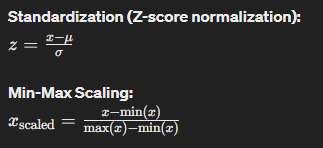


In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Sample data
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(data)

print("Standardized Data:")
print(scaled_data)
print("Min-Max Scaled Data:")
print(min_max_scaled_data)



Standardized Data:
[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]
Min-Max Scaled Data:
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


#### 10.2 Feature Transformation (e.g., Log Transformation)

Feature transformation involves transforming the distribution of a feature to make it more suitable for modeling. Log transformation is a common technique used to handle skewed data distributions.



In [26]:

import numpy as np

# Sample data
data = np.array([1, 2, 5, 10, 50])

# Log Transformation
transformed_data = np.log(data)

print("Original Data:")
print(data)
print("Log Transformed Data:")
print(transformed_data)


Original Data:
[ 1  2  5 10 50]
Log Transformed Data:
[0.         0.69314718 1.60943791 2.30258509 3.91202301]




#### 10.3 Feature Creation (e.g., Interaction Terms)

Feature creation involves generating new features from existing ones to capture more complex relationships between variables. Interaction terms are a type of feature created by multiplying two or more existing features.



In [27]:

import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Sample data
data = np.array([[2, 3], [4, 5], [6, 7]])

# Polynomial Features (Interaction Terms)
poly_features = PolynomialFeatures(degree=2, interaction_only=True)
interaction_terms = poly_features.fit_transform(data)

print("Original Data:")
print(data)
print("Interaction Terms:")
print(interaction_terms)




Original Data:
[[2 3]
 [4 5]
 [6 7]]
Interaction Terms:
[[ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]
 [ 1.  6.  7. 42.]]


### Conclusion

Feature engineering is a crucial step in the machine learning pipeline that involves manipulating and transforming raw data into features that are more suitable for modeling. Techniques like feature scaling, normalization, transformation, and creation help improve the performance of machine learning models by capturing important patterns and relationships in the data. Python provides various libraries, such as scikit-learn, for implementing these feature engineering techniques efficiently.

### 11. Model Evaluation and Validation

#### 11.1 Cross-Validation Techniques

Cross-validation is a robust method for estimating the performance of a machine learning model by splitting the dataset into multiple subsets, training the model on some subsets, and evaluating it on others. Common cross-validation techniques include k-fold cross-validation, stratified k-fold cross-validation, and leave-one-out cross-validation.



In [28]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate sample data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared:", cv_scores.mean())




Cross-Validation Scores: [0.99999983 0.99999968 0.99999976 0.9999994  0.99999943]
Mean R-squared: 0.9999996189031789


#### 11.2 Evaluation Metrics (e.g., R-squared, Mean Squared Error)

Evaluation metrics quantify the performance of a machine learning model by measuring how well it predicts the target variable. Common evaluation metrics for regression models include R-squared (coefficient of determination) and mean squared error (MSE).



In [29]:

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R-squared and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)




R-squared: 0.9999998282331861
Mean Squared Error: 0.010265673458298246


#### 11.3 Overfitting and Underfitting

Overfitting occurs when a model learns the training data too well, capturing noise and irrelevant patterns, leading to poor generalization to unseen data. Underfitting occurs when a model is too simple to capture the underlying structure of the data, resulting in high bias and poor performance.



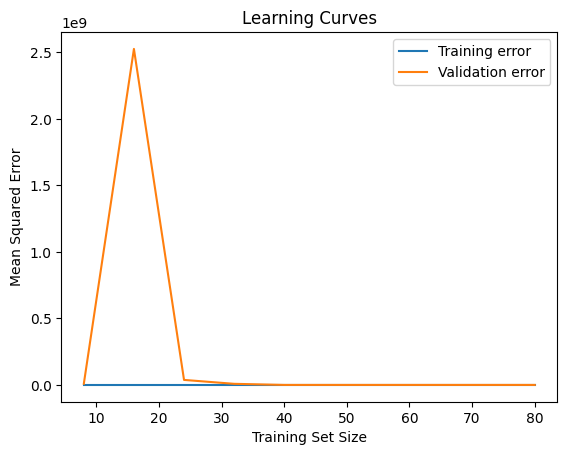

In [30]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=0.2, random_state=42)

# Create a pipeline with polynomial features
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10)),
    ('lin_reg', LinearRegression())
])

# Plot learning curves to diagnose overfitting or underfitting
train_sizes, train_scores, val_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error', cv=5)

train_mean = -np.mean(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, val_mean, label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.show()




### Conclusion

Model evaluation and validation are critical steps in the machine learning workflow to ensure that the trained model performs well on unseen data. Cross-validation techniques help estimate the performance of the model, while evaluation metrics provide quantitative measures of performance. Understanding overfitting and underfitting is essential for diagnosing model performance issues and selecting appropriate model complexity. Python provides powerful libraries like scikit-learn for implementing these techniques efficiently.

### 12. Advanced Topics

#### 12.1 Heteroscedasticity

Heteroscedasticity refers to the situation where the variability of the error term in a regression model is not constant across all levels of the independent variables. It violates one of the assumptions of linear regression, namely homoscedasticity, which assumes that the variance of the errors is constant.



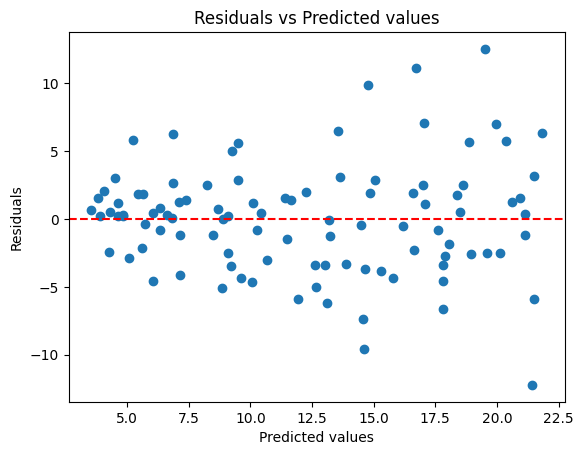

Breusch-Pagan test p-value: 0.000975198802658
Reject the null hypothesis: Heteroscedasticity is present.


In [39]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate some sample data for demonstration
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable
noise = np.random.normal(0, 2 + 0.5*X.flatten(), 100)  # Heteroscedastic noise
y = 3 + 2 * X.flatten() + noise  # Dependent variable

# Fit a linear regression model
X_with_intercept = sm.add_constant(X)  # Add a constant for the intercept term
model = sm.OLS(y, X_with_intercept).fit()

# Get the predicted values and residuals
y_pred = model.predict(X_with_intercept)
residuals = model.resid

# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

# Perform Breusch-Pagan test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, X_with_intercept)
print("Breusch-Pagan test p-value:", bp_test[1])

# Interpret the Breusch-Pagan test results
if bp_test[1] < 0.05:
    print("Reject the null hypothesis: Heteroscedasticity is present.")
else:
    print("Fail to reject the null hypothesis: Heteroscedasticity is not present.")


#### 12.2 Autocorrelation in Time Series Data

Autocorrelation, also known as serial correlation, is the correlation of a time series with a lagged version of itself. It indicates whether there is a relationship between the observations at different time points.



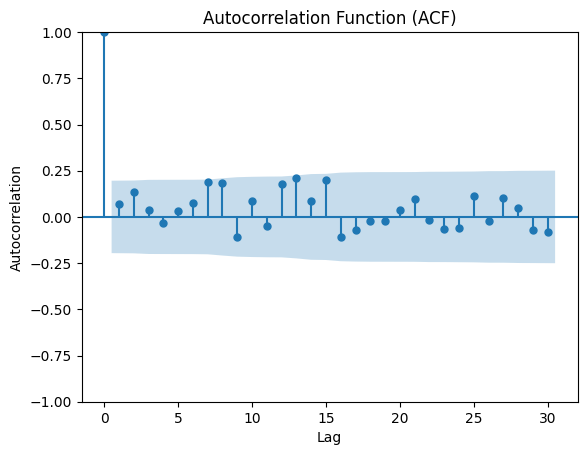

In [32]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generate sample time series data
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', periods=100, freq='D')
data = np.random.randn(100)
ts = pd.Series(data, index=dates)

# Plot autocorrelation function (ACF)
plot_acf(ts, lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()




#### 12.3 Generalized Linear Models and Extensions

Generalized Linear Models (GLMs) are a class of models that extends linear regression to accommodate non-normal error distributions and link functions. They are widely used for modeling non-Gaussian data types and binary outcomes.



In [33]:

import numpy as np
import statsmodels.api as sm

# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.random.binomial(1, 0.5, 100)

# Fit logistic regression model
logit_model = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial())
logit_result = logit_model.fit()

print(logit_result.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68.509
Date:                Thu, 14 Mar 2024   Deviance:                       137.02
Time:                        17:19:27   Pearson chi2:                     100.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01599
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3690      0.560     -0.659      0.5

### Conclusion

Advanced topics in regression analysis, such as heteroscedasticity, autocorrelation in time series data, and generalized linear models, provide deeper insights into the complexities of regression modeling. Understanding and addressing these issues are crucial for building accurate and reliable regression models. Python offers powerful libraries like statsmodels and scipy for implementing advanced regression techniques efficiently.